### TELECOM CHURN 

To reduce customer churn, telecom companies need to predict which customers are at high risk of churn. In this project, we will analyse customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn and identify the main indicators of churn.

Retaining high profitable customers is the main business goal here.

##### DATA DICTIONARY 

#### Acronyms   
- CIRCLE_ID - Telecom circle area to which the customer belongs to
- LOC - Local calls  within same telecom circle
- STD - STD calls  outside the calling circle
- IC - Incoming calls
- OG - Outgoing calls
- T2T - Operator T to T ie within same operator mobile to mobile
- T2M - Operator T to other operator mobile
- T2O - Operator T to other operator fixed line
- T2F - Operator T to fixed lines of T
- T2C - Operator T to its own call center
- ARPU - Average revenue per user
- MOU - Minutes of usage  voice calls
- AON - Age on network  number of days the customer is using the operator T network
- ONNET - All kind of calls within the same operator network
- OFFNET - All kind of calls outside the operator T network
- ROAM - Indicates that customer is in roaming zone during the call
- SPL - Special calls
- ISD - ISD calls
- RECH - Recharge
- NUM - Number
- AMT - Amount in local currency
- MAX - Maximum
- DATA - Mobile internet
- 3G - G network
- AV - Average
- VOL - Mobile internet usage volume in MB
- 2G - G network
- PCK - Prepaid service schemes called  PACKS
- NIGHT - Scheme to use during specific night hours only
- MONTHLY - Service schemes with validity equivalent to a month
- SACHET - Service schemes with validity smaller than a month
- *.6 - KPI for the month of June
- *.7 - KPI for the month of July
- *.8 - KPI for the month of August
- FB_USER - Service scheme to avail services of Facebook and similar social networking sites
- VBC - Volume based cost  when no specific scheme is not purchased and paid as per usage



In [ ]:
# #missing value inmpute
# #feature important 
# -----10---
# #correlation analysis using plots
# # advance analysis heat and histogram 
# #feature engnieering one var->another
# #var transformation 
# --------30-----------
# ##more than one model 
# ## cros vali
# #hyperparam tuning and scaling 
# #choose the best model 
# #relavnt evalution methods calculated
# --------- 35----------
# ##readibility and effecint code

##### IGNORE WARNINGS

In [1]:
import warnings
warnings.filterwarnings(action='ignore')

##### IMPORT LIBRARIES

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### IMPORTING & READING THE DATASET

In [3]:
# Importing dataset
data = pd.read_csv('Dataset/train.csv')
 
##copy data
data_copy=data

# To display maximum rows and columns
pd.set_option('max_columns',None)
pd.set_option('max_rows',None)

### CREATING REQUIRED FUNCTIONS

In [4]:
# To find number of rows and cols
def num_rows():
    rows, columns = data.shape
    print(f'The dataset has {rows} rows and {columns} columns')

# To find percentage missing values
def percentage_missing(data):
    print('\nPERCENTAGE MISSING VALUES:')
    c=0
    for feature in data:
        if data[feature].isnull().sum()!=0:
            print(f"The feature '{feature}' has {np.round((data[feature].isnull().mean()*100),2)}% missing values")
        else:
            c+=1
    if c == len(data.columns):print('There is no missing values in the dataset')
    print("\n")
def make_unique_dist_list(data):
# CHECKING THE UNIQUE AND DISTINCT VARIABLE
    rm_lst = []
    for i in data.columns:
        if data[i].nunique() in (1, 69999) and i!='churn_probability':
            print(i, data[i].nunique(), sep = ' --> ')
            rm_lst.append(i)
    return rm_lst
def remove_var_rmlist(rmlist,data):
# REMOVING THE ABOVE VARIABLE
    for i in rm_lst:
        del data[i]
    return data


### NUMBER OF ROWS AND COLS

In [5]:
num_rows()

The dataset has 69999 rows and 172 columns


#### NUMBER OF FEATURES

In [6]:
# Looping to find the number of categorical and numerical features
num, obj = 0,0
for feature in data.columns:
    if data.dtypes[feature] != 'O':
        num += 1
    else:
        obj += 1
print('NUMBER OF NUMERICAL AND CATEGORICAL FEATURES:')
print(f'There are {num} numerical features and {obj} categorical features.')

NUMBER OF NUMERICAL AND CATEGORICAL FEATURES:
There are 163 numerical features and 9 categorical features.


#### BASIC INFO ON THE DATASET

In [7]:
data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Data columns (total 172 columns):
 #    Column                    Dtype  
---   ------                    -----  
 0    id                        int64  
 1    circle_id                 int64  
 2    loc_og_t2o_mou            float64
 3    std_og_t2o_mou            float64
 4    loc_ic_t2o_mou            float64
 5    last_date_of_month_6      object 
 6    last_date_of_month_7      object 
 7    last_date_of_month_8      object 
 8    arpu_6                    float64
 9    arpu_7                    float64
 10   arpu_8                    float64
 11   onnet_mou_6               float64
 12   onnet_mou_7               float64
 13   onnet_mou_8               float64
 14   offnet_mou_6              float64
 15   offnet_mou_7              float64
 16   offnet_mou_8              float64
 17   roam_ic_mou_6             float64
 18   roam_ic_mou_7             float64
 19   roam_ic_mou_8             float64
 20   roam

### Looking for data duplicates

In [8]:
row, column = data[data.duplicated()].shape
print('There are no duplicates in the dataset.' if row==0 else f'There are {row} duplicates in the dataset.')

There are no duplicates in the dataset.


### ANALYSIS ON TARGET VARIABLE

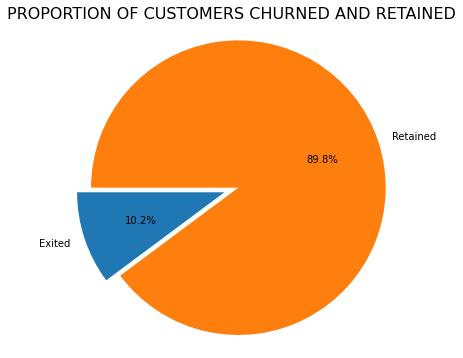

In [9]:
labels = 'Exited', 'Retained'
sizes = [data.churn_probability[data['churn_probability']==1].count(), 
         data.churn_probability[data['churn_probability']==0].count()]
explode = (0, 0.1)
fig1, ax1 = plt.subplots(figsize=(8, 6))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=False, startangle=180)
ax1.axis('equal')
plt.title("PROPORTION OF CUSTOMERS CHURNED AND RETAINED", size = 16)
plt.show()

#### DATA TREATMENT 

###  Removing features which has one unique and all distinct value

In [10]:
# def remove_var_rmlist(rmlist,data)
# # REMOVING THE ABOVE VARIABLE
#     for i in rm_lst:
#         del data[i]
rm_lst=make_unique_dist_list(data)
remove_var_rmlist(rm_lst,data)
# DATA DIMENSION AFTER REMOVAL
num_rows()

id --> 69999
circle_id --> 1
loc_og_t2o_mou --> 1
std_og_t2o_mou --> 1
loc_ic_t2o_mou --> 1
last_date_of_month_6 --> 1
last_date_of_month_7 --> 1
last_date_of_month_8 --> 1
std_og_t2c_mou_6 --> 1
std_og_t2c_mou_7 --> 1
std_og_t2c_mou_8 --> 1
std_ic_t2o_mou_6 --> 1
std_ic_t2o_mou_7 --> 1
std_ic_t2o_mou_8 --> 1
The dataset has 69999 rows and 158 columns


### MISSING VALUE TREATMENT

In [11]:
# Finding the percentage missing values in the dataset
percentage_missing(data)


PERCENTAGE MISSING VALUES:
The feature 'onnet_mou_6' has 3.95% missing values
The feature 'onnet_mou_7' has 3.84% missing values
The feature 'onnet_mou_8' has 5.29% missing values
The feature 'offnet_mou_6' has 3.95% missing values
The feature 'offnet_mou_7' has 3.84% missing values
The feature 'offnet_mou_8' has 5.29% missing values
The feature 'roam_ic_mou_6' has 3.95% missing values
The feature 'roam_ic_mou_7' has 3.84% missing values
The feature 'roam_ic_mou_8' has 5.29% missing values
The feature 'roam_og_mou_6' has 3.95% missing values
The feature 'roam_og_mou_7' has 3.84% missing values
The feature 'roam_og_mou_8' has 5.29% missing values
The feature 'loc_og_t2t_mou_6' has 3.95% missing values
The feature 'loc_og_t2t_mou_7' has 3.84% missing values
The feature 'loc_og_t2t_mou_8' has 5.29% missing values
The feature 'loc_og_t2m_mou_6' has 3.95% missing values
The feature 'loc_og_t2m_mou_7' has 3.84% missing values
The feature 'loc_og_t2m_mou_8' has 5.29% missing values
The featu

In [12]:
print('\nLESS THAN 50% MISSING VALUES IMPUTATION')
rm_lst = []

for i in data.columns:
    if data[i].isnull().mean()*100 > 50.0 :
        rm_lst.append(i)

print(rm_lst)
print(len(rm_lst))    


LESS THAN 50% MISSING VALUES IMPUTATION
['date_of_last_rech_data_6', 'date_of_last_rech_data_7', 'date_of_last_rech_data_8', 'total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8', 'count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8', 'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8', 'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 'arpu_3g_6', 'arpu_3g_7', 'arpu_3g_8', 'arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8', 'night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8', 'fb_user_6', 'fb_user_7', 'fb_user_8']
30


In [13]:
### Removing columns more than 50% null values
for feature in rm_lst:
    del data[feature]

In [14]:
num_rows()
percentage_missing(data)

The dataset has 69999 rows and 128 columns

PERCENTAGE MISSING VALUES:
The feature 'onnet_mou_6' has 3.95% missing values
The feature 'onnet_mou_7' has 3.84% missing values
The feature 'onnet_mou_8' has 5.29% missing values
The feature 'offnet_mou_6' has 3.95% missing values
The feature 'offnet_mou_7' has 3.84% missing values
The feature 'offnet_mou_8' has 5.29% missing values
The feature 'roam_ic_mou_6' has 3.95% missing values
The feature 'roam_ic_mou_7' has 3.84% missing values
The feature 'roam_ic_mou_8' has 5.29% missing values
The feature 'roam_og_mou_6' has 3.95% missing values
The feature 'roam_og_mou_7' has 3.84% missing values
The feature 'roam_og_mou_8' has 5.29% missing values
The feature 'loc_og_t2t_mou_6' has 3.95% missing values
The feature 'loc_og_t2t_mou_7' has 3.84% missing values
The feature 'loc_og_t2t_mou_8' has 5.29% missing values
The feature 'loc_og_t2m_mou_6' has 3.95% missing values
The feature 'loc_og_t2m_mou_7' has 3.84% missing values
The feature 'loc_og_t2

#### Removing date columns as it has no relavant to ten analysis being done

In [15]:
# List the date columns
date_cols = [date for date in data.columns.to_list() if 'date' in date]
print(date_cols) 
for feature in date_cols:
    del data[feature]

['date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8']


In [16]:
for feature in data:
    if data[feature].isnull().sum()!=0:
        #print(f"The feature '{feature}' has {np.round((data[feature].isnull().mean()*100),2)}% missing values")
        data=data[~np.isnan(data[feature])]
    

In [17]:
num_rows()

The dataset has 63842 rows and 125 columns


In [18]:
# create a new colulmn, which would be average  of 6th & 7th months
# lets first create list of columns belonging to 6th and 7th months
col_list = data.filter(regex='_6|_7').columns.str[:-2]
col_list.unique()
print(col_list)
print (data.shape)

# lets take the average now
for idx, col in enumerate(col_list.unique()):
    avg_col_name = "avg_"+col+"_av67" # lets create the column name dynamically
    col_6 = col+"_6"
    col_7 = col+"_7"
    data[avg_col_name] = (data[col_6] + data[col_7])/ 2

Index(['arpu', 'arpu', 'onnet_mou', 'onnet_mou', 'offnet_mou', 'offnet_mou',
       'roam_ic_mou', 'roam_ic_mou', 'roam_og_mou', 'roam_og_mou',
       'loc_og_t2t_mou', 'loc_og_t2t_mou', 'loc_og_t2m_mou', 'loc_og_t2m_mou',
       'loc_og_t2f_mou', 'loc_og_t2f_mou', 'loc_og_t2c_mou', 'loc_og_t2c_mou',
       'loc_og_mou', 'loc_og_mou', 'std_og_t2t_mou', 'std_og_t2t_mou',
       'std_og_t2m_mou', 'std_og_t2m_mou', 'std_og_t2f_mou', 'std_og_t2f_mou',
       'std_og_mou', 'std_og_mou', 'isd_og_mou', 'isd_og_mou', 'spl_og_mou',
       'spl_og_mou', 'og_others', 'og_others', 'total_og_mou', 'total_og_mou',
       'loc_ic_t2t_mou', 'loc_ic_t2t_mou', 'loc_ic_t2m_mou', 'loc_ic_t2m_mou',
       'loc_ic_t2f_mou', 'loc_ic_t2f_mou', 'loc_ic_mou', 'loc_ic_mou',
       'std_ic_t2t_mou', 'std_ic_t2t_mou', 'std_ic_t2m_mou', 'std_ic_t2m_mou',
       'std_ic_t2f_mou', 'std_ic_t2f_mou', 'std_ic_mou', 'std_ic_mou',
       'total_ic_mou', 'total_ic_mou', 'spl_ic_mou', 'spl_ic_mou',
       'isd_ic_mou', 'isd

In [19]:
# we dont need columns from which we have derived new features, we will drop those columns
num_rows()
col_to_drop = data.filter(regex='_6|_7').columns
data.drop(col_to_drop, axis=1, inplace=True)

num_rows()
data.columns

The dataset has 63842 rows and 165 columns
The dataset has 63842 rows and 85 columns


Index(['arpu_8', 'onnet_mou_8', 'offnet_mou_8', 'roam_ic_mou_8',
       'roam_og_mou_8', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_8',
       'loc_og_t2f_mou_8', 'loc_og_t2c_mou_8', 'loc_og_mou_8',
       'std_og_t2t_mou_8', 'std_og_t2m_mou_8', 'std_og_t2f_mou_8',
       'std_og_mou_8', 'isd_og_mou_8', 'spl_og_mou_8', 'og_others_8',
       'total_og_mou_8', 'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_8',
       'loc_ic_t2f_mou_8', 'loc_ic_mou_8', 'std_ic_t2t_mou_8',
       'std_ic_t2m_mou_8', 'std_ic_t2f_mou_8', 'std_ic_mou_8',
       'total_ic_mou_8', 'spl_ic_mou_8', 'isd_ic_mou_8', 'ic_others_8',
       'total_rech_num_8', 'total_rech_amt_8', 'max_rech_amt_8',
       'last_day_rch_amt_8', 'vol_2g_mb_8', 'vol_3g_mb_8', 'monthly_2g_8',
       'sachet_2g_8', 'monthly_3g_8', 'sachet_3g_8', 'aon', 'aug_vbc_3g',
       'jul_vbc_3g', 'jun_vbc_3g', 'churn_probability', 'avg_arpu_av67',
       'avg_onnet_mou_av67', 'avg_offnet_mou_av67', 'avg_roam_ic_mou_av67',
       'avg_roam_og_mou_av67', 'avg_loc_og_t2

##### Checking skewness before outlier treatment

In [22]:
for feature in data:
    print(f'The {feature} has {np.round(data[feature].skew(),2)} skew ')

The arpu_8 has 19.92 skew 
The onnet_mou_8 has 7.16 skew 
The offnet_mou_8 has 6.22 skew 
The roam_ic_mou_8 has 25.93 skew 
The roam_og_mou_8 has 24.08 skew 
The loc_og_t2t_mou_8 has 19.7 skew 
The loc_og_t2m_mou_8 has 5.43 skew 
The loc_og_t2f_mou_8 has 12.65 skew 
The loc_og_t2c_mou_8 has 17.63 skew 
The loc_og_mou_8 has 7.63 skew 
The std_og_t2t_mou_8 has 7.35 skew 
The std_og_t2m_mou_8 has 8.96 skew 
The std_og_t2f_mou_8 has 18.7 skew 
The std_og_mou_8 has 5.44 skew 
The isd_og_mou_8 has 140.59 skew 
The spl_og_mou_8 has 18.95 skew 
The og_others_8 has 139.96 skew 
The total_og_mou_8 has 4.48 skew 
The loc_ic_t2t_mou_8 has 13.82 skew 
The loc_ic_t2m_mou_8 has 6.39 skew 
The loc_ic_t2f_mou_8 has 12.26 skew 
The loc_ic_mou_8 has 5.46 skew 
The std_ic_t2t_mou_8 has 26.31 skew 
The std_ic_t2m_mou_8 has 19.05 skew 
The std_ic_t2f_mou_8 has 33.09 skew 
The std_ic_mou_8 has 14.64 skew 
The total_ic_mou_8 has 4.9 skew 
The spl_ic_mou_8 has 26.86 skew 
The isd_ic_mou_8 has 22.42 skew 
The i

In [23]:
for feature in data:
    if data[feature].dtype !='O' and feature!='churn_probability' and len(data[feature].unique())>2:
        lower_quartile = data[feature].quantile(0.25)
        upper_quartile = data[feature].quantile(0.75)
        IQR = upper_quartile - lower_quartile
        lower_fence = lower_quartile - (1.5*IQR)
        upper_fence = upper_quartile + (1.5*IQR)
        
        data[feature] = np.where(data[feature]>upper_fence, 
                                upper_fence,   
                                data[feature])
        
        data[feature] = np.where(data[feature]<lower_fence,
                               lower_fence,
                               data[feature])

In [24]:
for feature in data:
    print(f'The {feature} has {np.round(data[feature].skew(),2)} skew ')

The arpu_8 has 1.02 skew 
The onnet_mou_8 has 1.2 skew 
The offnet_mou_8 has 1.16 skew 
The roam_ic_mou_8 has 0 skew 
The roam_og_mou_8 has 0 skew 
The loc_og_t2t_mou_8 has 1.21 skew 
The loc_og_t2m_mou_8 has 1.18 skew 
The loc_og_t2f_mou_8 has 1.22 skew 
The loc_og_t2c_mou_8 has 0 skew 
The loc_og_mou_8 has 1.17 skew 
The std_og_t2t_mou_8 has 1.2 skew 
The std_og_t2m_mou_8 has 1.2 skew 
The std_og_t2f_mou_8 has 0 skew 
The std_og_mou_8 has 1.22 skew 
The isd_og_mou_8 has 0 skew 
The spl_og_mou_8 has 1.24 skew 
The og_others_8 has 0 skew 
The total_og_mou_8 has 1.16 skew 
The loc_ic_t2t_mou_8 has 1.19 skew 
The loc_ic_t2m_mou_8 has 1.13 skew 
The loc_ic_t2f_mou_8 has 1.22 skew 
The loc_ic_mou_8 has 1.12 skew 
The std_ic_t2t_mou_8 has 1.22 skew 
The std_ic_t2m_mou_8 has 1.22 skew 
The std_ic_t2f_mou_8 has 0 skew 
The std_ic_mou_8 has 1.23 skew 
The total_ic_mou_8 has 1.09 skew 
The spl_ic_mou_8 has 0 skew 
The isd_ic_mou_8 has 0 skew 
The ic_others_8 has 0 skew 
The total_rech_num_8 has

All variables skewness is removed and data can be consumed for model creation

In [25]:
rm_lst=make_unique_dist_list(data)
data=remove_var_rmlist(rm_lst,data)
# DATA DIMENSION AFTER REMOVAL
num_rows()
percentage_missing(data)

roam_ic_mou_8 --> 1
roam_og_mou_8 --> 1
loc_og_t2c_mou_8 --> 1
std_og_t2f_mou_8 --> 1
isd_og_mou_8 --> 1
og_others_8 --> 1
std_ic_t2f_mou_8 --> 1
spl_ic_mou_8 --> 1
isd_ic_mou_8 --> 1
ic_others_8 --> 1
vol_2g_mb_8 --> 1
vol_3g_mb_8 --> 1
monthly_2g_8 --> 1
sachet_2g_8 --> 1
monthly_3g_8 --> 1
sachet_3g_8 --> 1
aug_vbc_3g --> 1
jul_vbc_3g --> 1
jun_vbc_3g --> 1
avg_std_og_t2f_mou_av67 --> 1
avg_isd_og_mou_av67 --> 1
avg_og_others_av67 --> 1
avg_isd_ic_mou_av67 --> 1
avg_vol_3g_mb_av67 --> 1
avg_monthly_2g_av67 --> 1
avg_sachet_2g_av67 --> 1
avg_monthly_3g_av67 --> 1
avg_sachet_3g_av67 --> 1
The dataset has 63842 rows and 57 columns

PERCENTAGE MISSING VALUES:
There is no missing values in the dataset




##### UNIVARIATE ANALYSIS

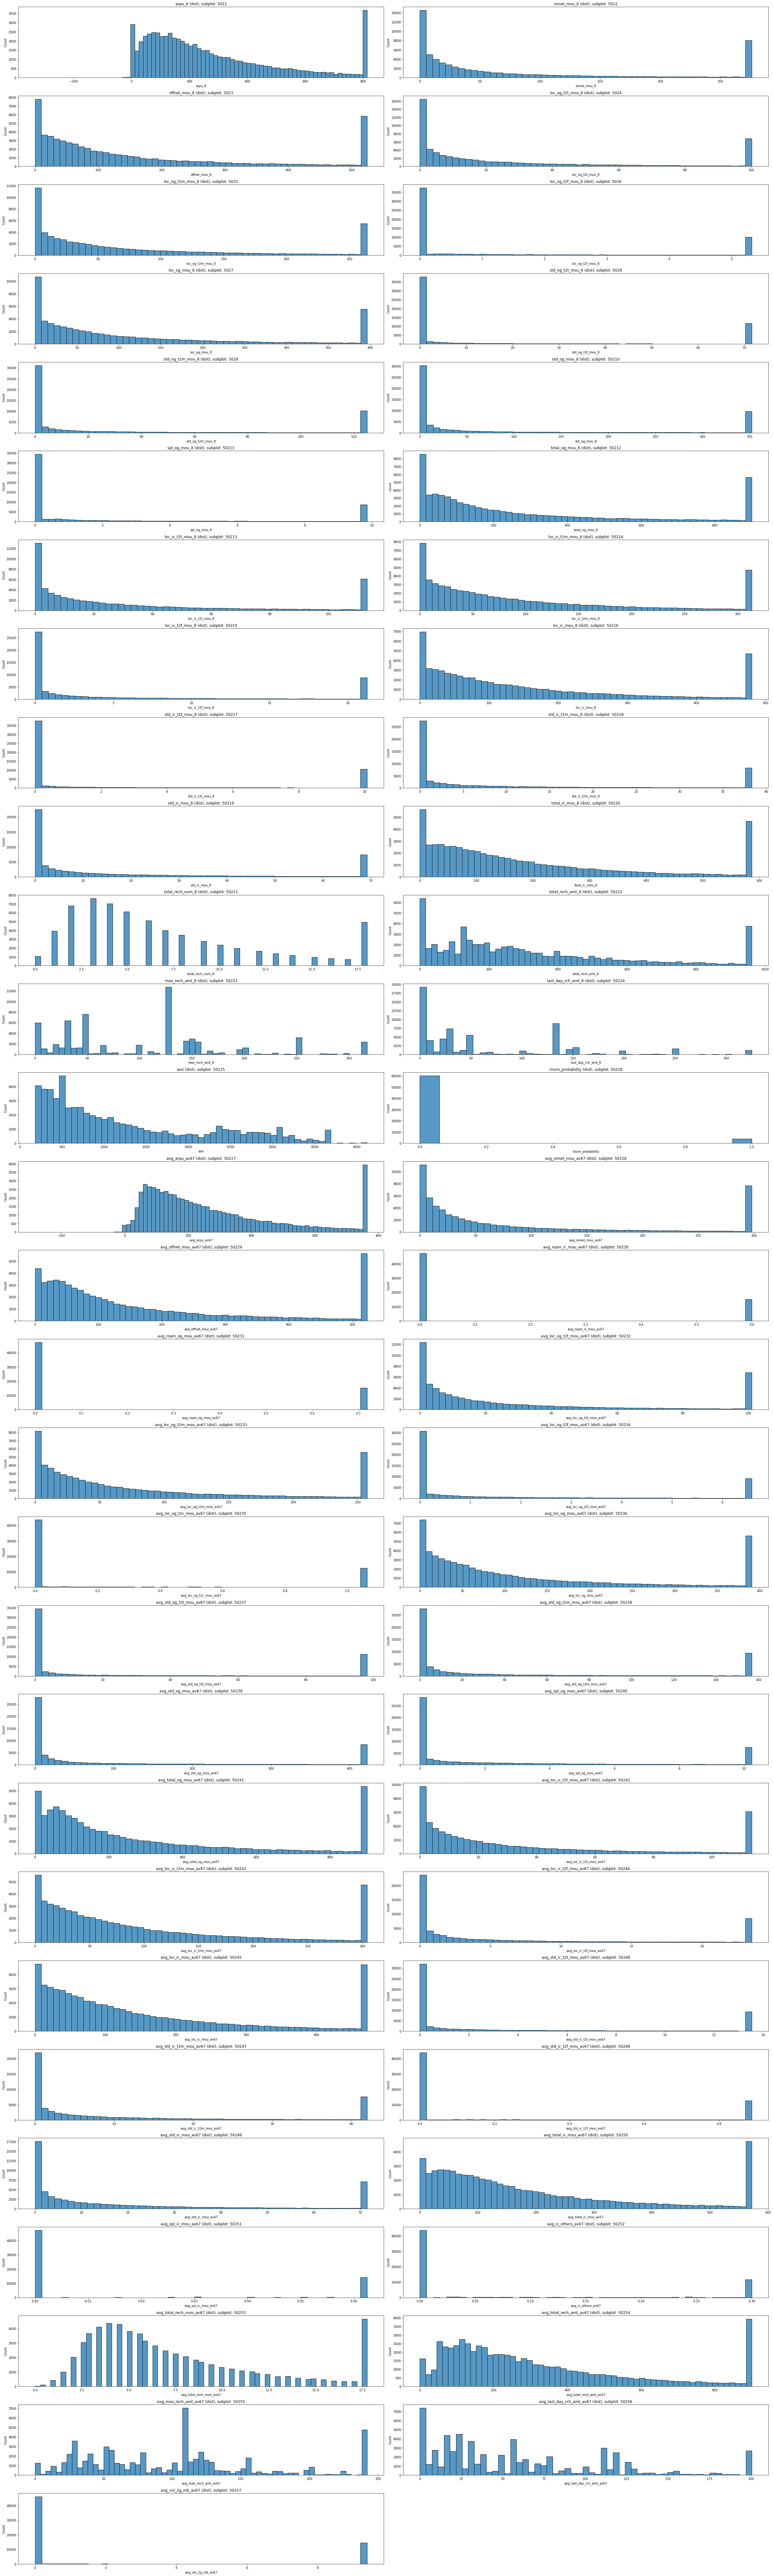

In [26]:
target_col = list(data.columns)
a = 50  # number of rows
b = 2  # number of columns
c = 1  # initialize plot counter
#target_col=[]


        
fig = plt.figure(figsize=(26,30))
fig.set_size_inches(35, 200)

for i in target_col:

    if c!=150:
        plt.subplot(a, b, c)
        plt.title('{} (dist), subplot: {}{}{}'.format(i, a, b, c))
        plt.xlabel(i)
        sns.histplot(data[i])
        c = c + 1
        #print(c)
      
    
plt.tight_layout()
plt.show();

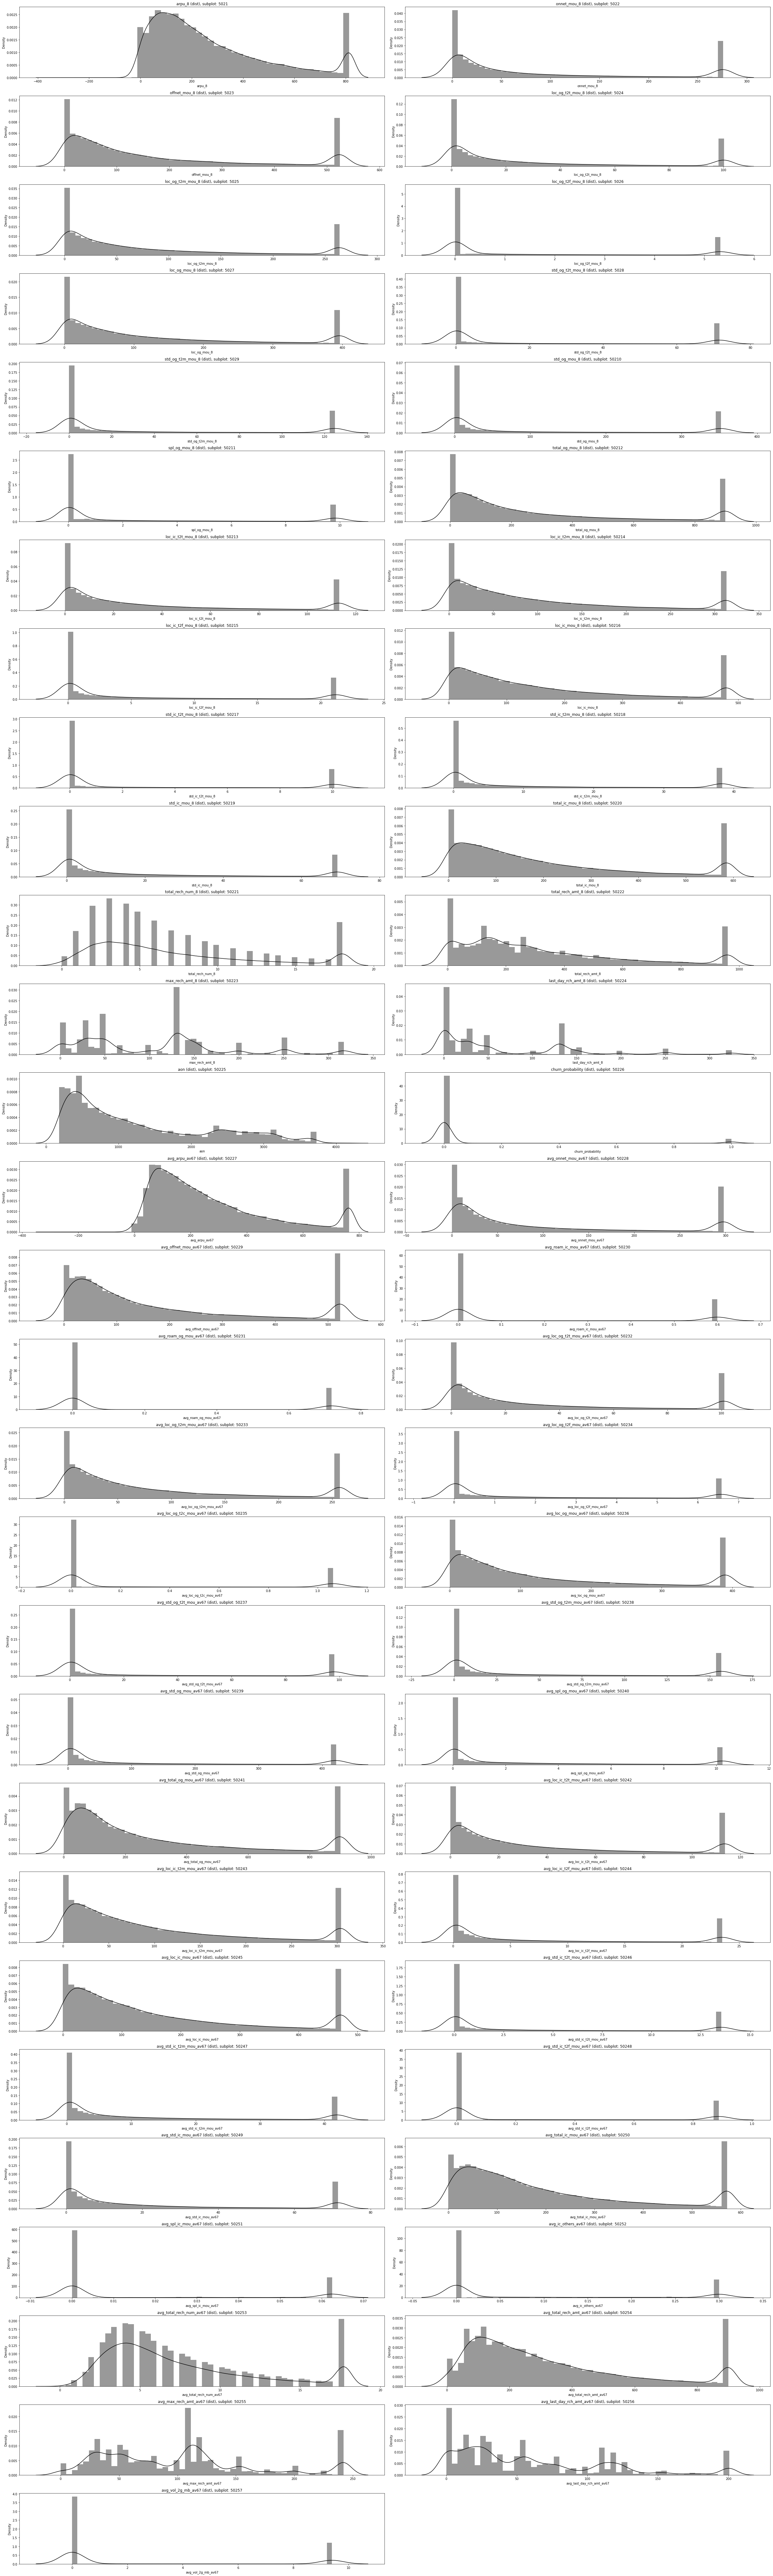

In [27]:
target_col = list(data.columns)
a = 50  # number of rows
b = 2  # number of columns
c = 1  # initialize plot counter
#target_col=[]


        
fig = plt.figure(figsize=(26,30))
fig.set_size_inches(35, 200)

for i in target_col:

    if c!=150:
        plt.subplot(a, b, c)
        plt.title('{} (dist), subplot: {}{}{}'.format(i, a, b, c))
        plt.xlabel(i)
        sns.distplot(data[i], color='black')
        c = c + 1
        #print(c)
      
    
plt.tight_layout()
plt.show();

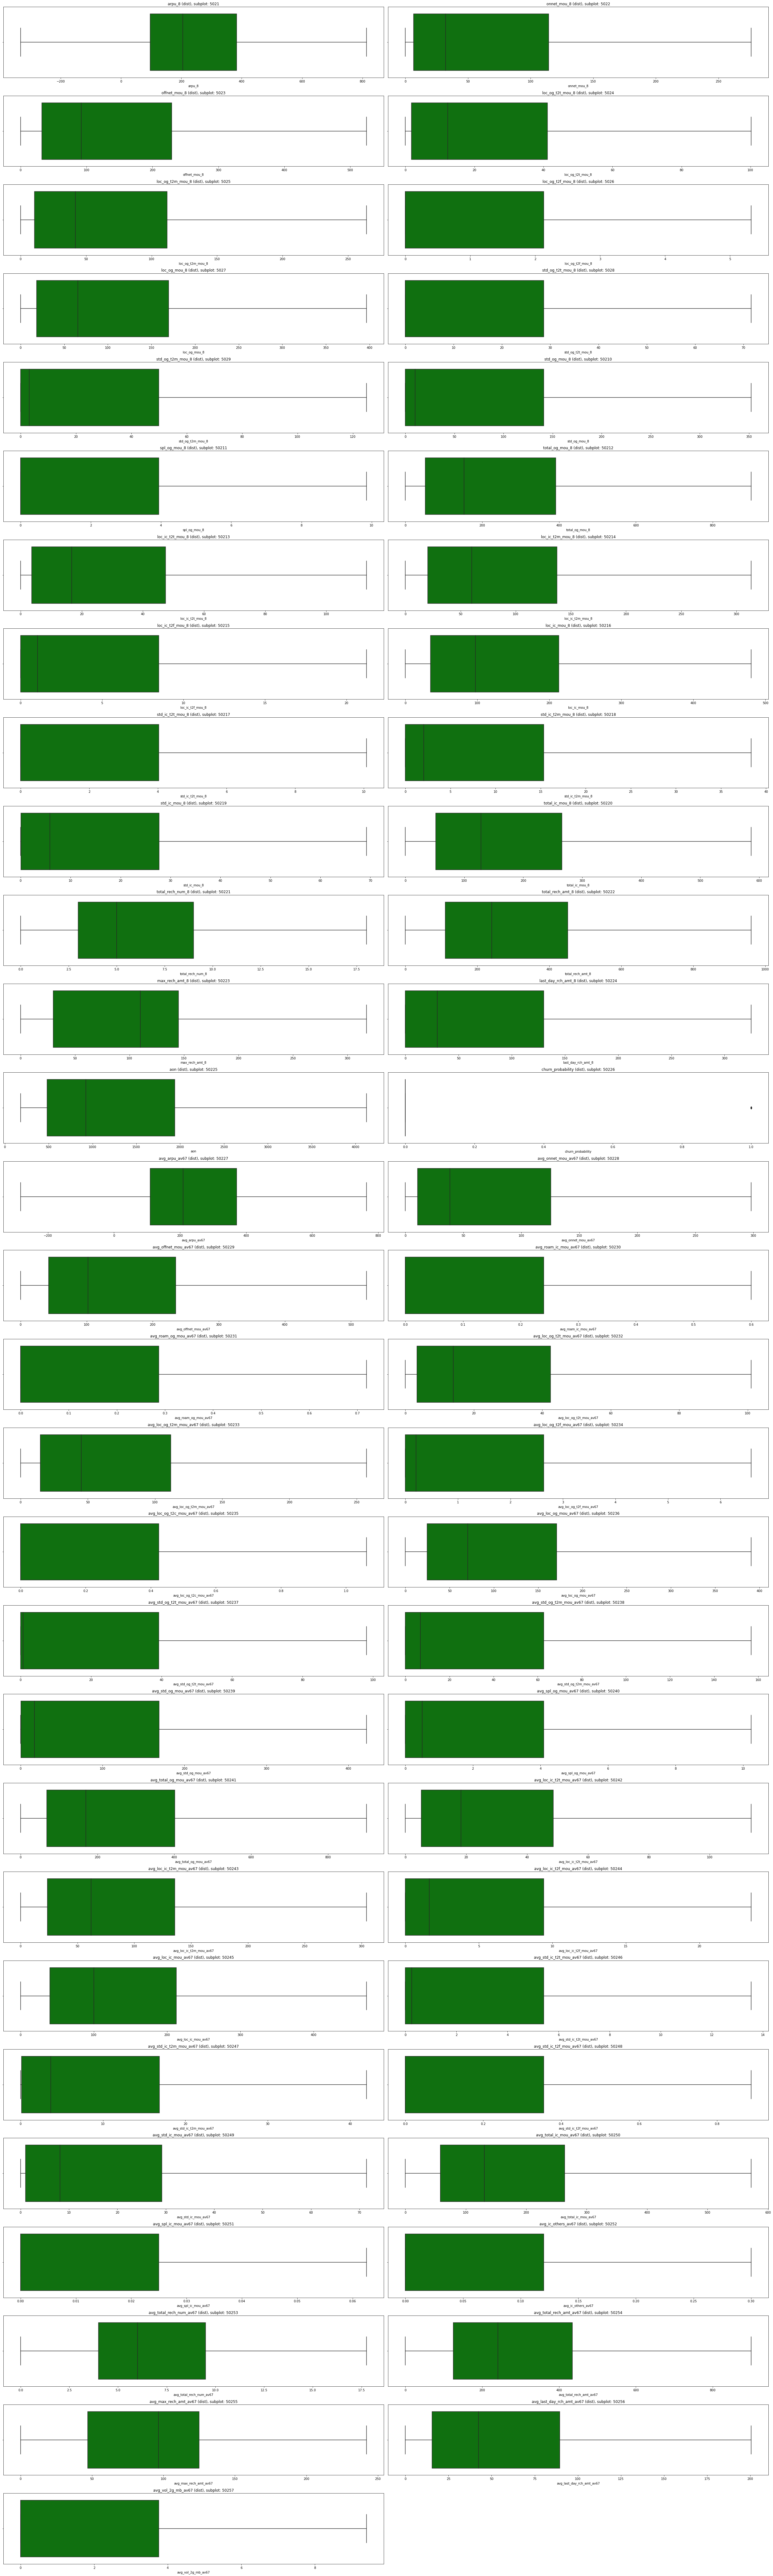

In [28]:
target_col = list(data.columns)
a = 50  # number of rows
b = 2  # number of columns
c = 1  # initialize plot counter
#target_col=[]


        
fig = plt.figure(figsize=(26,30))
fig.set_size_inches(35, 200)

for i in target_col:

    if c!=150:
        plt.subplot(a, b, c)
        plt.title('{} (dist), subplot: {}{}{}'.format(i, a, b, c))
        plt.xlabel(i)
        sns.boxplot(x=data[i],color='green')
        c = c + 1
        #print(c)
      
    
plt.tight_layout()
plt.show();

##### MULTIVARIATE ANALYSIS

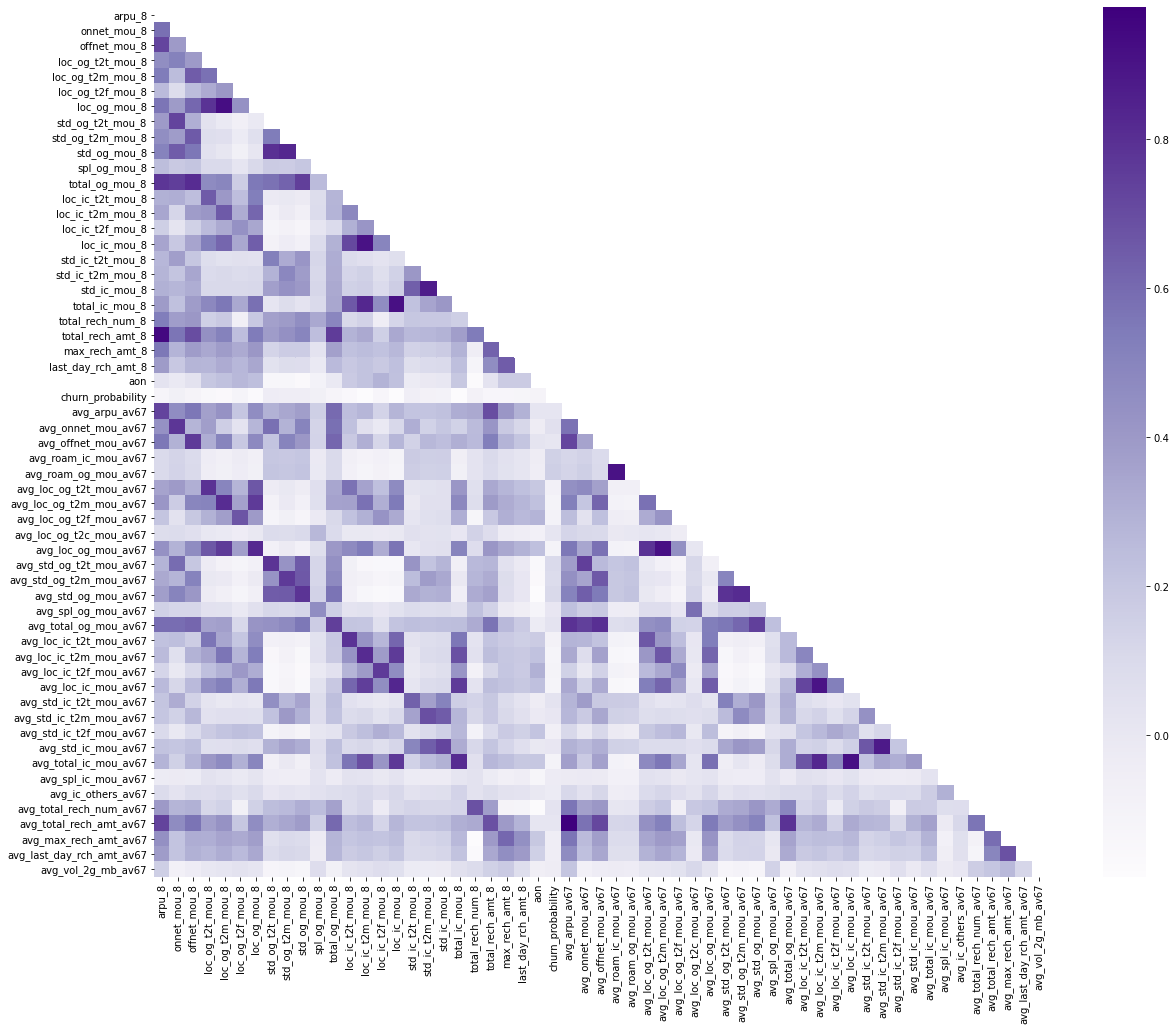

In [29]:
##create heat map
corr = data.corr()
mask = np.triu(corr)
plt.figure(figsize=(20,16))
sns.heatmap(corr, 
            annot=False , 
            fmt='.2f', 
            mask=mask, 
            cmap='Purples')
plt.show()

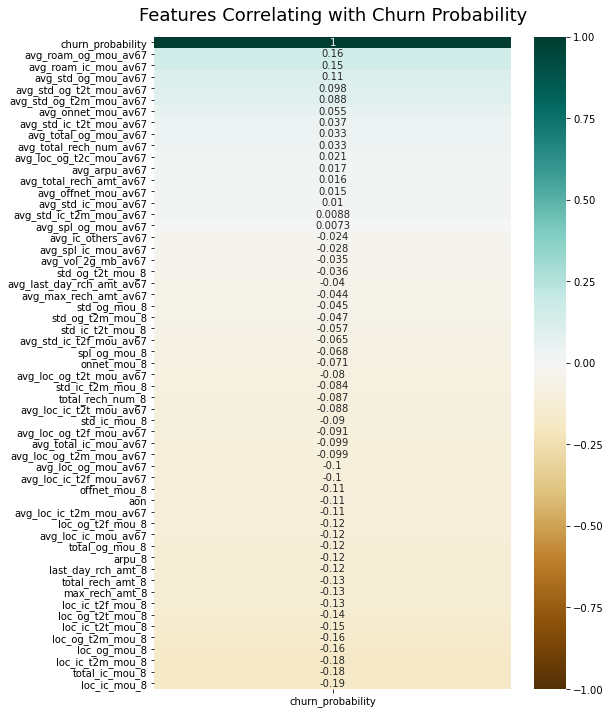

In [30]:
plt.figure(figsize=(8, 12))
heatmap_outputvar = sns.heatmap(data.corr()[['churn_probability']].sort_values(by='churn_probability', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap_outputvar.set_title('Features Correlating with Churn Probability', fontdict={'fontsize':18}, pad=16);

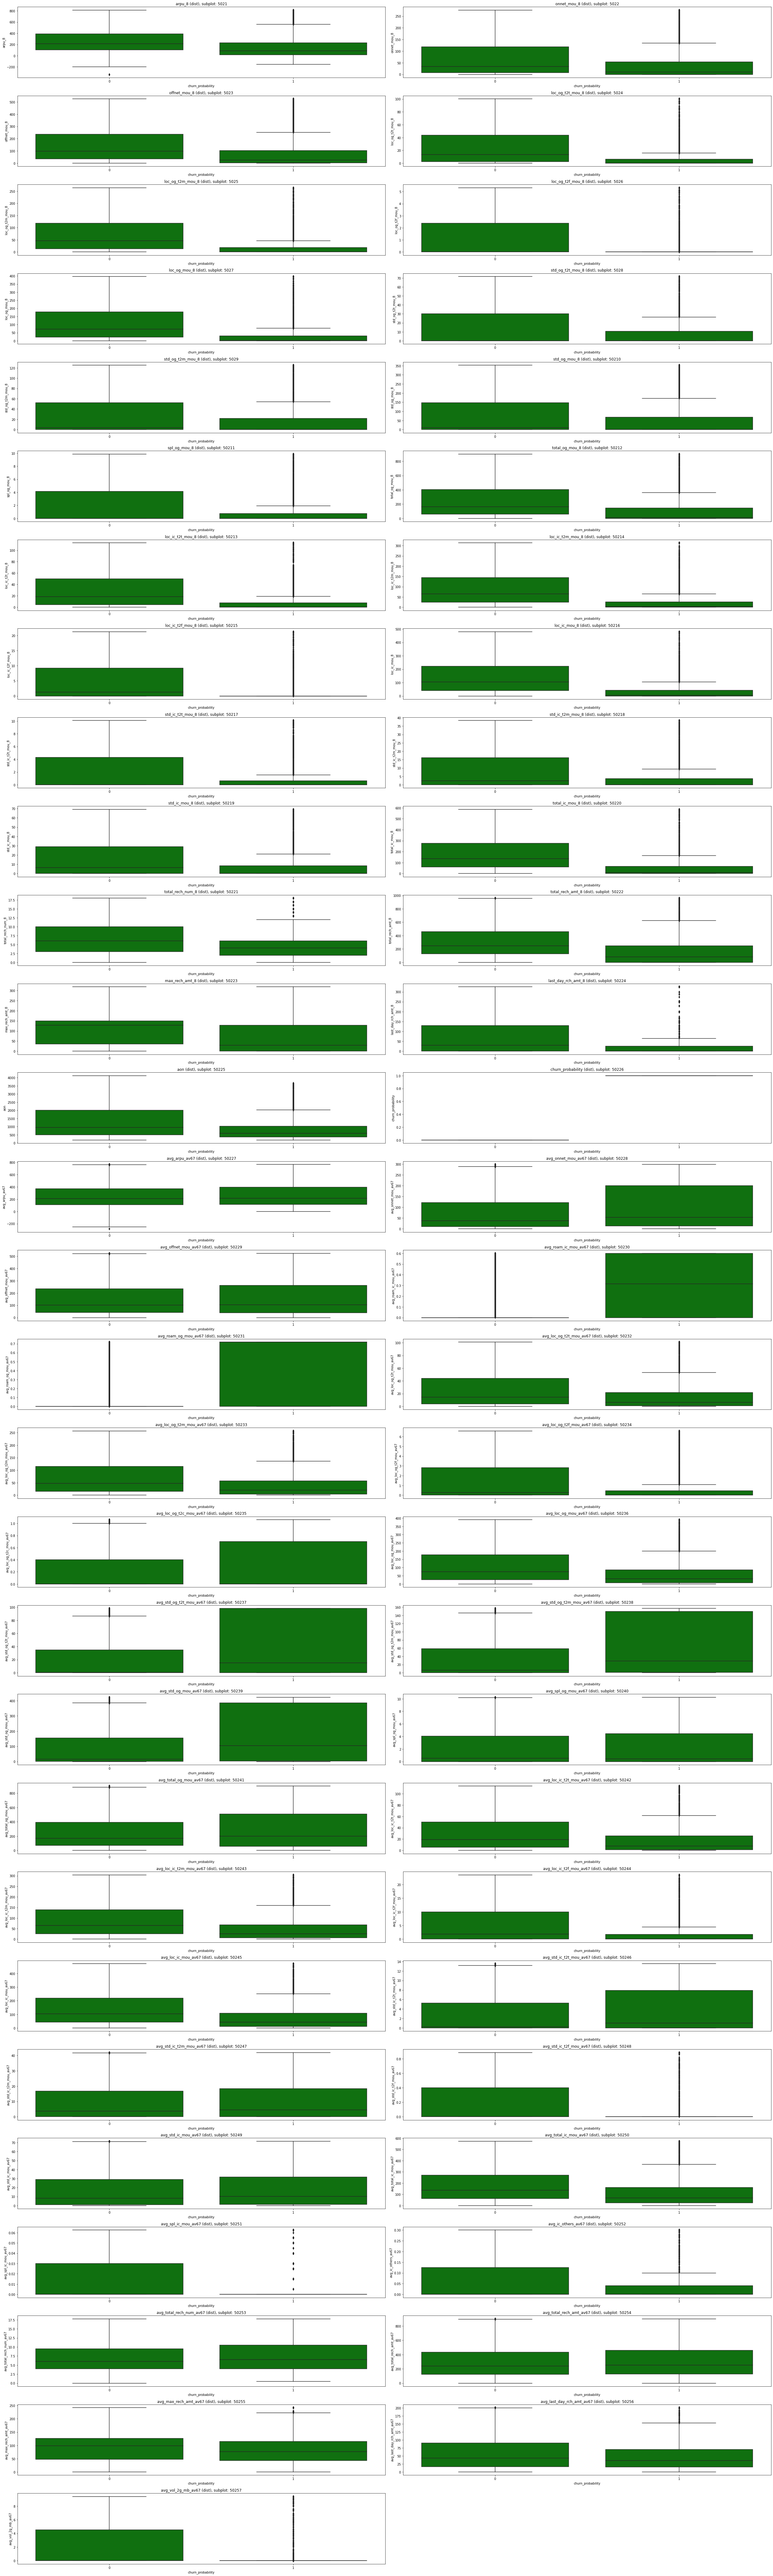

In [31]:
target_col = list(data.columns)
a = 50  # number of rows
b = 2  # number of columns
c = 1  # initialize plot counter
#target_col=[]


        
fig = plt.figure(figsize=(26,30))
fig.set_size_inches(35, 200)

for i in target_col:

    if c!=150:
        plt.subplot(a, b, c)
        plt.title('{} (dist), subplot: {}{}{}'.format(i, a, b, c))
        plt.xlabel(i)
        sns.boxplot(x = data.churn_probability,y=data[i],color='green')
        c = c + 1
        #print(c)
      
    
plt.tight_layout()
plt.show();

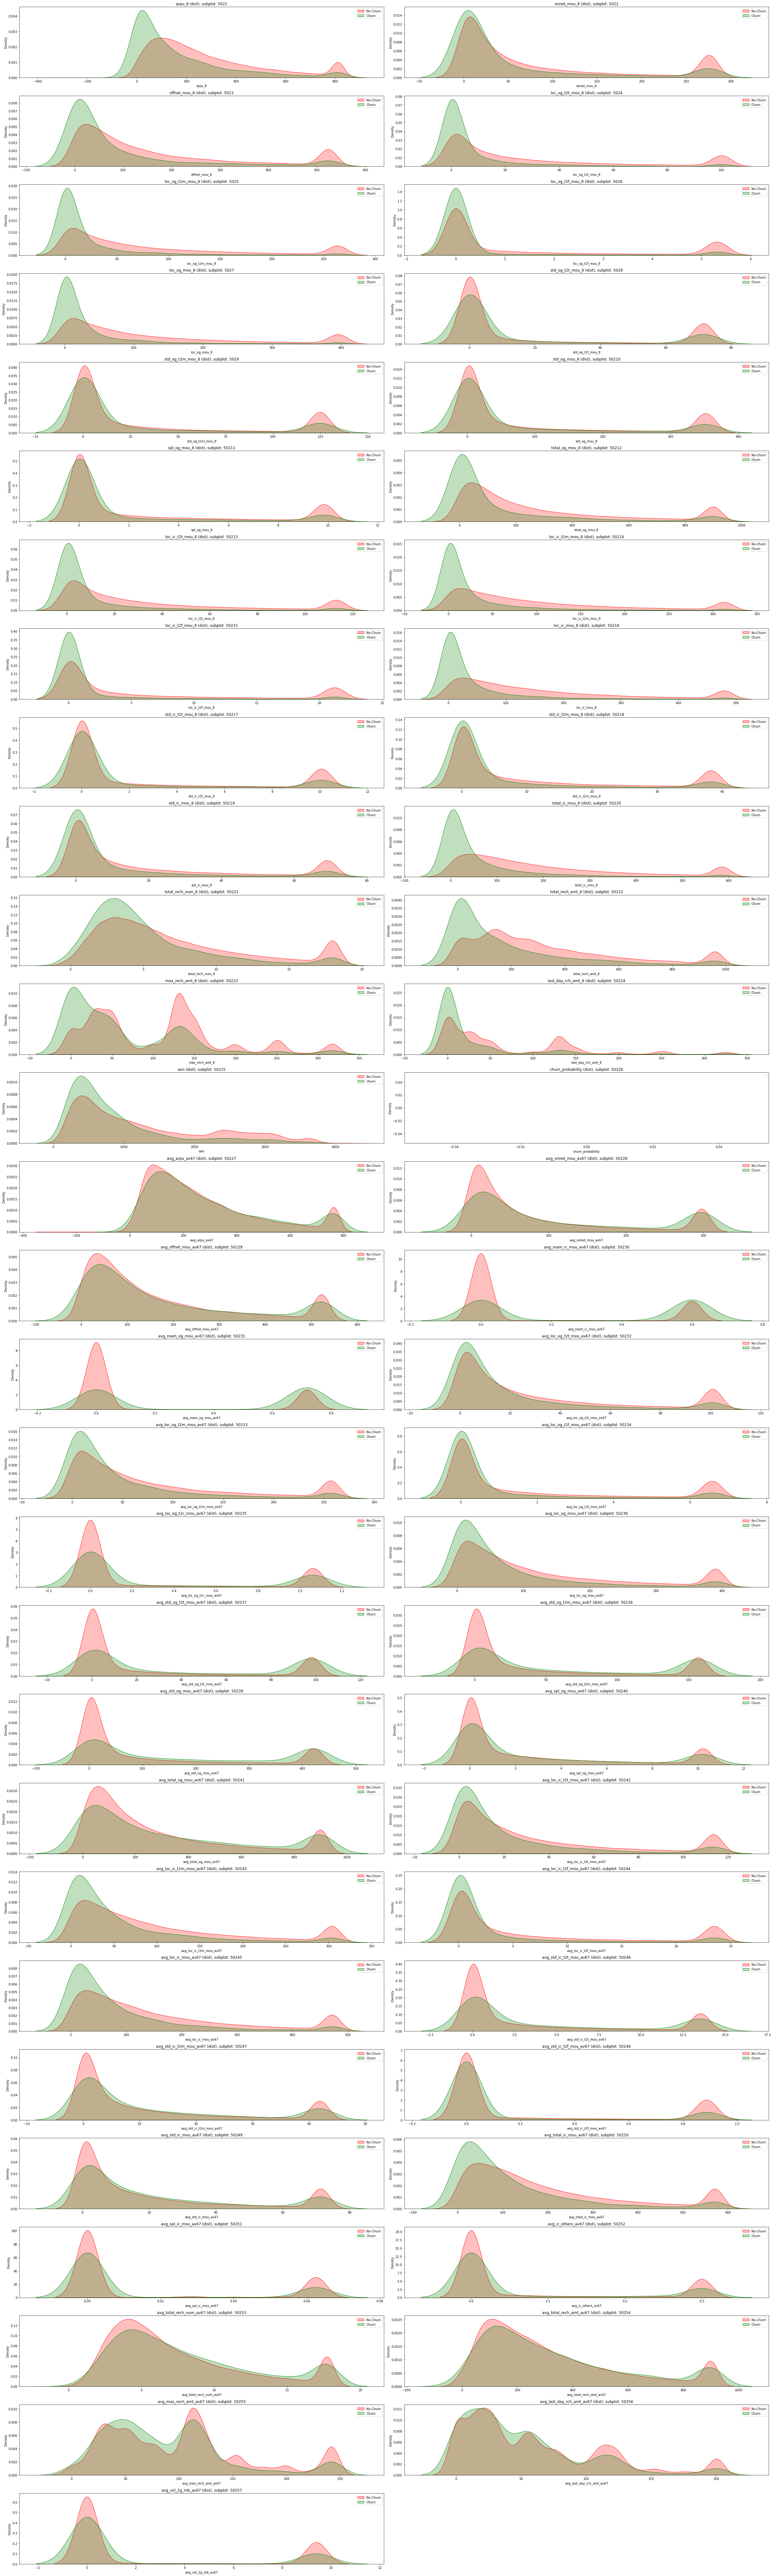

In [32]:
target_col = list(data.columns)
a = 50  # number of rows
b = 2  # number of columns
c = 1  # initialize plot counter
#target_col=[]


        
fig = plt.figure(figsize=(26,30))
fig.set_size_inches(35, 200)

for i in target_col:

    if c!=150:
        plt.subplot(a, b, c)
        plt.title('{} (dist), subplot: {}{}{}'.format(i, a, b, c))
        plt.xlabel(i)
        # churn Vs Base Cost
        ax = sns.kdeplot(data[i][(data["churn_probability"] == 0)],
                color="Red", shade = True)
        ax = sns.kdeplot(data[i][(data["churn_probability"] == 1)],
                ax =ax, color="Green", shade= True)
        ax.legend(["No-Churn","Churn"],loc='upper right')
       
        c = c + 1
        #print(c)
      
    
plt.tight_layout()
plt.show();

###### Remove target col from feature dataframe

In [33]:
X = data.drop(['churn_probability'], axis=1)
y = data['churn_probability']

data.drop('churn_probability', axis=1, inplace=True)

In [34]:
# apply scaling on the dataset
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

scaler = preprocessing.StandardScaler().fit(X)
X = scaler.transform(X)

In [45]:
from imblearn.over_sampling import SMOTE
#over_sampler = RandomOverSampler(random_state=42)
sm = SMOTE(random_state=42)
X_r, y_r = sm.fit_resample(X, y)

AttributeError: module 'sklearn.utils._openmp_helpers' has no attribute '__pyx_capi__'

In [37]:
!pip install imbalanced-learn --user

  Using cached imbalanced_learn-0.9.1-py3-none-any.whl (199 kB)


In [41]:
import sklearn
print(sklearn.show_versions())


System:
    python: 3.8.8 (default, Apr 13 2021, 15:08:03) [MSC v.1916 64 bit (AMD64)]
executable: C:\Users\vaide\anaconda3\python.exe
   machine: Windows-10-10.0.19041-SP0

Python dependencies:
          pip: 21.0.1
   setuptools: 52.0.0.post20210125
      sklearn: 0.24.1
        numpy: 1.20.1
        scipy: 1.6.2
       Cython: 0.29.23
       pandas: 1.2.4
   matplotlib: 3.3.4
       joblib: 1.1.0
threadpoolctl: 2.1.0

Built with OpenMP: True
None


In [42]:
!pip install -U imbalanced-learn